# Data Science Project SoSe 2024
## Team 07
- Maximilian Hoffmann
- Kilian Kempf
- Daniel Schneider
- Tom Schuck

## Project Submission

### Data Initialization

In [1]:
import os

import pandas as pd

from data_management import DataManager

DATA_DIR = os.path.join(os.getcwd(), 'data/Instacart')

op_prior = pd.read_csv(os.path.join(DATA_DIR, 'order_products__prior.csv.zip'))
op_train = pd.read_csv(os.path.join(DATA_DIR, 'order_products__train.csv.zip'))

tip_train = pd.read_csv(os.path.join(DATA_DIR, 'tip_trainingsdaten1_.csv'))[['order_id', 'tip']]
tip_test = pd.read_csv(os.path.join(DATA_DIR, 'tip_testdaten1_template.csv'))

orders = pd.read_csv(os.path.join(DATA_DIR, 'orders.csv.zip'))
aisles = pd.read_csv(os.path.join(DATA_DIR, 'aisles.csv.zip'))
departments = pd.read_csv(os.path.join(DATA_DIR, 'departments.csv.zip'))
products = pd.read_csv(os.path.join(DATA_DIR, 'products.csv.zip'))

data_manager = DataManager(op_prior, op_train, tip_train, tip_test, orders, products, aisles, departments)
order_amount = len(data_manager.get_orders_tip())

### Feature Engineering

In [2]:
from feature_engineering.static_features import TipHistory, ReorderedRatio, OrderSize, PrevTippedProductsRatio, \
    CustomerLifetime, PrevOrderTipped, OrderFrequency, SimOrdersTipRatio, AvgSizePrevOrders, MeanOrderedRate, \
    LastTipSequence, RelDaysSinceTip, DaysSinceTip, OrderNumberSquared, HodHighTipProbability, DowHighTipProbability, \
    ContainsAlcohol

from feature_engineering.dynamic_features import ProductTipRate, DepartmentTipRate, AisleTipRate, DynamicFeatureTest1, \
    DynamicFeatureTest2, AssocRulesAisles, AssocRulesDepartments

# Kilian
tip_history = TipHistory()
reordered_rate = ReorderedRatio()
order_size = OrderSize()
prev_tipped_products_ratio = PrevTippedProductsRatio()
customer_lifetime = CustomerLifetime()
prev_order_tipped = PrevOrderTipped()

# Daniel
order_frequency = OrderFrequency()
mean_ordered_rate = MeanOrderedRate()
rel_days_since_tip = RelDaysSinceTip()
days_since_tip = DaysSinceTip()

# Max
sim_orders_tip_ratio = SimOrdersTipRatio()
product_tip_rate = ProductTipRate()
department_tip_rate = DepartmentTipRate()
aisle_tip_rate = AisleTipRate()
last_tip_sequence = LastTipSequence()

# Tom
avg_size_prev_orders = AvgSizePrevOrders()

# Features analysis
order_number_squared = OrderNumberSquared()
hod_high_tip_probability = HodHighTipProbability()
dow_high_tip_probability = DowHighTipProbability()
contains_alcohol = ContainsAlcohol()

assoc_rules_departments = AssocRulesDepartments()
assoc_rules_aisles = AssocRulesAisles()

# Test
dynamic_feature_test_1 = DynamicFeatureTest1()
dynamic_feature_test_2 = DynamicFeatureTest2()

In [3]:
# Static Features
data_manager.register_feature(tip_history)
data_manager.register_feature(reordered_rate)
data_manager.register_feature(order_size)
data_manager.register_feature(customer_lifetime)
data_manager.register_feature(prev_order_tipped)
data_manager.register_feature(prev_tipped_products_ratio)

data_manager.register_feature(order_frequency)
data_manager.register_feature(sim_orders_tip_ratio)
data_manager.register_feature(avg_size_prev_orders)
data_manager.register_feature(mean_ordered_rate)
data_manager.register_feature(last_tip_sequence)
data_manager.register_feature(rel_days_since_tip)
data_manager.register_feature(days_since_tip)

data_manager.register_feature(order_number_squared)
data_manager.register_feature(hod_high_tip_probability)
data_manager.register_feature(dow_high_tip_probability)
data_manager.register_feature(contains_alcohol)

# Dynamic Features
data_manager.register_feature(dynamic_feature_test_1)
data_manager.register_feature(dynamic_feature_test_2)
data_manager.register_feature(product_tip_rate)
data_manager.register_feature(department_tip_rate)
data_manager.register_feature(aisle_tip_rate)

# data_manager.register_feature(assoc_rules_departments)
# data_manager.register_feature(assoc_rules_aisles)

In [4]:
# data_manager.compute_features()

In [5]:
data_manager.get_orders_tip().head(100)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,tip
0,2539329,1,prior,1,2,8,NaN,0.0
1,2398795,1,prior,2,3,7,15.0,0.0
2,473747,1,prior,3,3,12,21.0,0.0
3,2254736,1,prior,4,4,7,29.0,0.0
4,431534,1,prior,5,4,15,28.0,0.0
...,...,...,...,...,...,...,...,...
95,1916106,12,prior,3,5,8,14.0,0.0
96,1057378,12,prior,4,3,9,26.0,0.0
97,221248,12,prior,5,1,9,30.0,0.0
98,2618231,13,prior,1,6,12,NaN,0.0


In [6]:
# data_manager.export_features('data/prepared_data/computed_features.csv.zip', only_static=False)

In [7]:
data_manager.import_features('data/prepared_data/computed_features.csv.zip', only_static=False)

In [8]:
data_manager.calculate_feature_correlations(only_static=False)

                       Feature  Correlation
0                  tip_history     0.559060
1            prev_order_tipped     0.490379
2         sim_orders_tip_ratio     0.411784
3   prev_tipped_products_ratio     0.396700
4            last_tip_sequence     0.339536
5             product_tip_rate     0.276978
6               aisle_tip_rate     0.241822
7                dept_tip_rate     0.226838
8     dow_high_tip_probability     0.142086
9             contains_alcohol     0.117845
10             reordered_ratio     0.116099
11                order_number     0.094750
12    hod_high_tip_probability     0.089347
13           customer_lifetime     0.070360
14           mean_ordered_rate     0.058233
15        order_number_squared     0.053961
16                  order_size     0.006547
17        avg_size_prev_orders    -0.013932
18      dynamic_feature_test_2    -0.023511
19      dynamic_feature_test_1    -0.023511
20          rel_days_since_tip    -0.120450
21      days_since_prior_order  

In [9]:
# data_manager.visualize_feature_analysis(only_static=False)

In [10]:
data_manager.get_orders_tip().shape

(3346083, 30)

In [11]:
data_manager.get_orders_tip().head(100)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,tip,contains_alcohol,prev_tipped_products_ratio,...,sim_orders_tip_ratio,order_number_squared,avg_size_prev_orders,dow_high_tip_probability,order_size,product_tip_rate,dynamic_feature_test_2,dynamic_feature_test_1,aisle_tip_rate,dept_tip_rate
0,2539329,1,prior,1,2,8,NaN,0.0,0,NaN,...,NaN,1,NaN,0,5,-0.214783,0.090909,0.090909,-0.154412,-0.136680
1,2398795,1,prior,2,3,7,15.0,0.0,0,0.0,...,-0.375000,4,0.200000,0,6,-0.126002,0.181818,0.181818,-0.128714,-0.128948
2,473747,1,prior,3,3,12,21.0,0.0,0,0.0,...,-0.312500,9,-0.090909,0,5,-0.134117,0.272727,0.272727,-0.162890,-0.153835
3,2254736,1,prior,4,4,7,29.0,0.0,0,0.0,...,-0.490079,16,-0.062500,0,5,-0.185615,0.363636,0.363636,-0.152853,-0.136680
4,431534,1,prior,5,4,15,28.0,0.0,0,0.0,...,-0.367677,25,0.523810,0,8,-0.063549,0.454545,0.454545,-0.072083,-0.091502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1916106,12,prior,3,5,8,14.0,0.0,0,0.0,...,-0.057692,9,0.200000,0,12,-0.161177,0.600000,0.600000,-0.187044,-0.169895
96,1057378,12,prior,4,3,9,26.0,0.0,0,0.0,...,-0.056421,16,0.875000,0,20,-0.092866,0.800000,0.800000,-0.102275,-0.115211
97,221248,12,prior,5,1,9,30.0,0.0,0,0.0,...,-0.064890,25,0.692308,1,22,-0.090662,1.000000,1.000000,-0.125295,-0.114649
98,2618231,13,prior,1,6,12,NaN,0.0,0,NaN,...,NaN,1,NaN,0,5,-0.096765,0.076923,0.076923,-0.062865,-0.067655


In [12]:
# test = data_manager.get_orders_tip()

In [13]:
# print(f"Number of orders: {len(data_manager.get_orders_tip())}")
# print(f"Number of orders did not change: {order_amount == len(data_manager.get_orders_tip())}\n")
# print(f"Number of NaN or null values in each column:\n{data_manager.get_orders_tip().isnull().sum()}")

In [14]:
# order_ids = data_manager.get_orders_tip(complete=True).groupby('user_id')['order_id'].head(5)
# order_amount = len(order_ids)

In [15]:
# data_manager.set_subset(order_ids)

In [16]:
# data_manager.get_orders_tip().head(25)

In [17]:
# print(f"Number of orders: {len(data_manager.get_orders_tip())}")
# print(f"Number of orders did not change: {order_amount == len(data_manager.get_orders_tip())}\n")
# print(f"Number of NaN or null values in each column:\n{data_manager.get_orders_tip().isnull().sum()}")

In [18]:
# order_ids = data_manager.get_orders_tip(complete=True).groupby('user_id')['order_id'].head(4)
# order_amount = len(order_ids)
# 
# data_manager.set_subset(order_ids)
# data_manager.get_orders_tip().head(25)

In [19]:
# print(f"Number of orders: {len(data_manager.get_orders_tip())}")
# print(f"Number of orders did not change: {order_amount == len(data_manager.get_orders_tip())}\n")
# print(f"Number of NaN or null values in each column:\n{data_manager.get_orders_tip().isnull().sum()}")

### Analysis
- Only orders from the training set (orders with tip information) are considered

In [20]:
# from analysis import DayOfWeek, HourOfDay, DaysSincePriorOrder, OrderNumber, Department, Aisle, Product, GeneralAnalysis

In [21]:
# day_of_week = DayOfWeek(data_manager)
# hour_of_day = HourOfDay(data_manager)
# days_since_prior_order = DaysSincePriorOrder(data_manager)
# order_number = OrderNumber(data_manager)
# department = Department(data_manager)
# aisle = Aisle(data_manager)
# product = Product(data_manager)
# number_order_user = NumberOrderUser(data_manager)
# general_analysis = GeneralAnalysis(data_manager)

In [22]:
# day_of_week.execute_analysis()

In [23]:
# hour_of_day.execute_analysis()

In [24]:
# days_since_prior_order.execute_analysis()

In [25]:
# order_number.execute_analysis()

In [26]:
# department.execute_analysis()

In [27]:
# aisle.execute_analysis()

In [28]:
# product.execute_analysis()

In [29]:
# number_order_user.execute_analysis()

### Data Preparation

In [30]:
# from feature_engineering.static_features import DowHighTipProbability, HodHighTipProbability, OrderNumberSquared, \
#     ContainsAlcohol
#
# data_manager.register_feature(DowHighTipProbability())
# data_manager.register_feature(HodHighTipProbability())
# data_manager.register_feature(OrderNumberSquared())
# data_manager.register_feature(ContainsAlcohol())

In [31]:
# data_manager.compute_features()

### Model Training & Evaluation

Order is important:
- Remove first order of each user and assign the dataset for parameter tuning
- Initialize cross-validation splitter
- Export splits
- Tune the parameters of the model with the dataset from 1.

In [32]:
from data_management.cross_validation import LastOrderUserTSCVSplitter

In [33]:
orders_tip = data_manager.get_orders_tip()
orders_tip.shape

(3346083, 30)

In [34]:
orders_tip_train = data_manager.get_orders_tip_train()
orders_tip_train.shape

(3214874, 30)

In [35]:
orders_tip_test = data_manager.get_orders_tip_test()
orders_tip_test.shape

(131209, 30)

In [36]:
data_manager.remove_first_orders()

In [37]:
orders_tip_train = data_manager.get_orders_tip_train().copy()
orders_tip_train.shape

(3008665, 30)

In [38]:
# cv = KFold(n_splits=5, shuffle=True, random_state=42)

In [39]:
last_order_user_tscv_splitter = LastOrderUserTSCVSplitter(data_manager, n_splits=5)

In [40]:
# splits = last_order_user_tscv_splitter.split(orders_tip_train)

In [41]:
# folds = {}
# prev_test = 0
# for i, (train_index, test_index) in enumerate(splits):
#     print(f'Fold {i + 1}')
#     print(f'Train: {len(train_index)}')
#     print(f'Test: {len(test_index)}')
#     print(f'Orders: {len(orders_tip_train)}')
#     print(f'Sum equal: {(len(train_index) + len(test_index) + prev_test) == len(orders_tip_train)}')
#     print(f'Ratio: {len(test_index) / (len(train_index) + len(test_index))}')
# 
#     train_orders = orders_tip_train.loc[train_index]
#     test_orders = orders_tip_train.loc[test_index]
#     current_fold = {
#         'train': train_orders,
#         'test': test_orders
#     }
#     folds[f'fold_{i}'] = current_fold
#     prev_test += len(test_index)

In [42]:
last_order_user_tscv_splitter.export_splits('data/prepared_data/')

In [43]:
# user_tscv_splitter = UserTSCVSplitter(data_manager, n_splits=5, validation_set_ratio=0.2, seed=42)

In [44]:
# splits = user_tscv_splitter.split(orders_tip_train)

In [45]:
# folds = {}
# prev_test = 0
# for i, (train_index, test_index) in enumerate(splits):
#     print(f'Fold {i + 1}')
#     print(f'Train: {len(train_index)}')
#     print(f'Test: {len(test_index)}')
#     print(f'Orders: {len(orders_tip_train)}')
#     print(f'Sum equal: {(len(train_index) + len(test_index) + prev_test) == len(orders_tip_train)}')
#     print(f'Ratio: {len(test_index) / (len(train_index) + len(test_index))}')
# 
#     train_orders = orders_tip_train.loc[train_index]
#     test_orders = orders_tip_train.loc[test_index]
#     current_fold = {
#         'train': train_orders,
#         'test': test_orders
#     }
#     folds[f'fold_{i}'] = current_fold
#     prev_test += len(test_index)

In [46]:
# user_tscv_splitter.export_splits('data/prepared_data/')

In [47]:
# features = ['order_number', 'order_dow', 'order_hour_of_day', 'days_since_prior_order', 'order_size', 'tip_history',
#             'dynamic_feature_test_1', 'dynamic_feature_test_2']
#
# prepared_splits_dict = user_tscv_splitter.import_splits('data/prepared_data/', features)

In [48]:
features = ['order_number', 'order_dow', 'order_hour_of_day', 'days_since_prior_order', 'order_size', 'tip_history',
            'dynamic_feature_test_1', 'dynamic_feature_test_2']

prepared_splits_dict = last_order_user_tscv_splitter.import_splits('data/prepared_data/', features)

In [49]:
from data_management import DatasetSelector
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from tempfile import mkdtemp
from joblib import Memory

pipeline_steps = [('selector', DatasetSelector(prepared_splits_dict)),
                  ('estimator', DecisionTreeClassifier())]

cachedir = mkdtemp()
memory = Memory(location=cachedir, verbose=0)

pipeline = Pipeline(pipeline_steps, verbose=False, memory=memory)

In [50]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'estimator__criterion': ['entropy'],
    'estimator__max_depth': [9, 10],
    'estimator__min_samples_leaf': [256]
}

grid_search_clf = GridSearchCV(pipeline, param_grid, cv=last_order_user_tscv_splitter, scoring='accuracy', verbose=1,
                               n_jobs=-1, return_train_score=True)

In [51]:
X = orders_tip_train[features]
y = orders_tip_train['tip'].astype(bool)

In [52]:
X.head(25)

,order_number,order_dow,order_hour_of_day,days_since_prior_order,order_size,tip_history,dynamic_feature_test_1,dynamic_feature_test_2
0,2,3,7,15.0,6,0.000000,0.181818,0.181818
1,3,3,12,21.0,5,0.000000,0.272727,0.272727
2,4,4,7,29.0,5,0.000000,0.363636,0.363636
3,5,4,15,28.0,8,0.000000,0.454545,0.454545
4,6,2,7,19.0,4,0.000000,0.545455,0.545455
5,7,1,9,20.0,5,0.000000,0.636364,0.636364
6,8,1,14,14.0,6,0.000000,0.727273,0.727273
7,9,1,16,0.0,6,0.000000,0.818182,0.818182
8,10,4,8,30.0,9,0.000000,0.909091,0.909091
9,2,5,10,10.0,6,0.000000,0.133333,0.133333


In [53]:
print(f'X shape: {X.shape}')
print(f'y shape: {y.shape}')

X shape: (3008665, 8)
y shape: (3008665,)


In [54]:
grid_search_clf.fit(X, y)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


GridSearchCV(cv=LastOrderUserTSCVSplitter(data_manager=<data_management.data_manager.DataManager object at 0x000002733890EB50>,
                                          n_splits=5),
             estimator=Pipeline(memory=Memory(location=C:\Users\I538883\AppData\Local\Temp\tmp29kifryc\joblib),
                                steps=[('selector',
                                        DatasetSelector(prepared_splits_dict={-8070716829487604255:          order_number  order_dow  order_hour_of_day...
2                      0.666667  
3                      0.833333  
9                      0.200000  
...                         ...  
3008655                0.444444  
3008656                0.555556  
3008657                0.666667  
3008658                0.777778  
3008659                0.888889  

[2104923 rows x 8 columns]})),
                                       ('estimator',
                                        DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'estimator__criterion': ['entropy'],
                         'estimator__max_depth': [9, 10],
                         'estimator__min_samples_leaf': [256]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [55]:
cv_results = grid_search_clf.cv_results_
result_list = [grid_search_clf.cv_results_[f'split{i}_test_score'][grid_search_clf.best_index_] for i in range(5)]

for i, result in enumerate(result_list):
    print(f'Accuracy (Fold {i + 1}): {result}')

print(f'\nMean Accuracy: {cv_results["mean_test_score"][grid_search_clf.best_index_]}')

Accuracy (Fold 1): 0.8006876518483674
Accuracy (Fold 2): 0.7954841932214404
Accuracy (Fold 3): 0.7883527326407753
Accuracy (Fold 4): 0.7813235936126125
Accuracy (Fold 5): 0.7771936532211814

Mean Accuracy: 0.7886083649088753


In [56]:
grid_search_clf.best_score_

0.7886083649088753

In [57]:
grid_search_clf.best_params_

{'estimator__criterion': 'entropy',
 'estimator__max_depth': 9,
 'estimator__min_samples_leaf': 256}

In [58]:
best_estimator = grid_search_clf.best_estimator_

In [59]:
from data_management import get_best_cv_scores

scores = get_best_cv_scores(grid_search_clf)
scores

,Test Accuracy,Train Accuracy
Fold 1,0.800688,0.760410
Fold 2,0.795484,0.757647
Fold 3,0.788353,0.755372
Fold 4,0.781324,0.753445
Fold 5,0.777194,0.751735
Mean,0.788608,0.755722


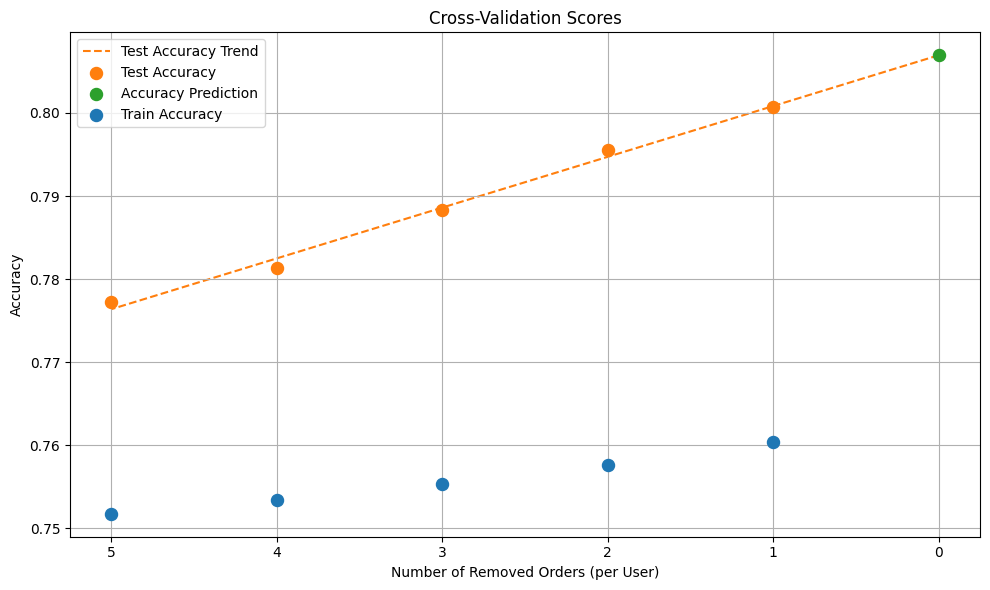

0.8069529439678353

In [60]:
from data_management import estimate_accuracy

accuracy = estimate_accuracy(grid_search_clf)
accuracy

### Validation

In [61]:
# features = ['order_number', 'order_dow', 'order_hour_of_day', 'days_since_prior_order', 'order_size', 'tip_history',
#             'dynamic_feature_test_1', 'dynamic_feature_test_2']
#
# prepared_splits_dict = last_order_user_tscv_splitter.import_splits('data/prepared_data/', features)

In [62]:
# all_orders = data_manager.get_orders_tip(complete=True)
# all_orders.shape

In [63]:
# data_manager.set_subset(all_orders['order_id'])

In [64]:
# validation_test = data_manager.get_orders_tip_test()
# validation_test.shape

In [65]:
# validation_train = data_manager.get_orders_tip_train()
# validation_train.shape

In [66]:
# validation_train_without_first = validation_train[validation_train['order_number'] > 1]
# validation_train_without_first.shape

In [67]:
# prepared_splits_dict[-1147446606210854265].shape[0]

In [68]:
# all_orders_without_first = all_orders[all_orders['order_number'] > 1].reset_index(drop=True)
# all_orders_without_first.shape

In [69]:
# validation_train_without_first[features].reset_index(drop=True)

In [70]:
# prepared_splits_dict[-1147446606210854265]

In [71]:
# round(prepared_splits_dict[-1147446606210854265], 6).equals(round(validation_train_without_first[
#                                                                       features].reset_index(drop=True), 6))

In [72]:
# validation_test[features]

In [73]:
# prepared_splits_dict[4027820417624348460]

In [74]:
# round(prepared_splits_dict[4027820417624348460].reset_index(drop=True), 6).equals(round(
#     validation_test[features].reset_index(drop=True), 6))

### Prediction

IMPORTANT:
- Before predicting, the indices must probably be reseted, for X and y
- To save the results, we must join the predictions with the template based on the ORDER_ID, beause the indices don't align


In [75]:
# orders_tip_test = data_manager.get_orders_tip_test()
# orders_tip_test['tip'] = best_estimator.predict(orders_tip_test[features])

In [76]:
# orders_tip_test_csv = orders_tip_test[tip_test.columns].copy()
# orders_tip_test_csv.rename(columns={tip_test.columns[0]: ''}, inplace=True)
# orders_tip_test_csv

In [77]:
# orders_tip_test_csv.to_csv(os.path.join(DATA_DIR, 'tip_testdaten1.csv'), index=False)